Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.5016 - loss: 0.6999 - val_accuracy: 0.5200 - val_loss: 0.6922
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.5042 - loss: 0.6924 - val_accuracy: 0.4750 - val_loss: 0.6939
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.5348 - loss: 0.6892 - val_accuracy: 0.4800 - val_loss: 0.6953
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.5787 - loss: 0.6816 - val_accuracy: 0.4800 - val_loss: 0.7030
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.5867 - loss: 0.6796 - val_accuracy: 0.4800 - val_loss: 0.6961
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.6720 - loss: 0.6425 - val_accuracy: 0.5200 - val_loss: 0.6982
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.6318 - loss: 0.6307 - val_accuracy: 0.4700 - val_loss: 0.6982
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.8430 - loss: 0.5384 - val_accuracy: 0.

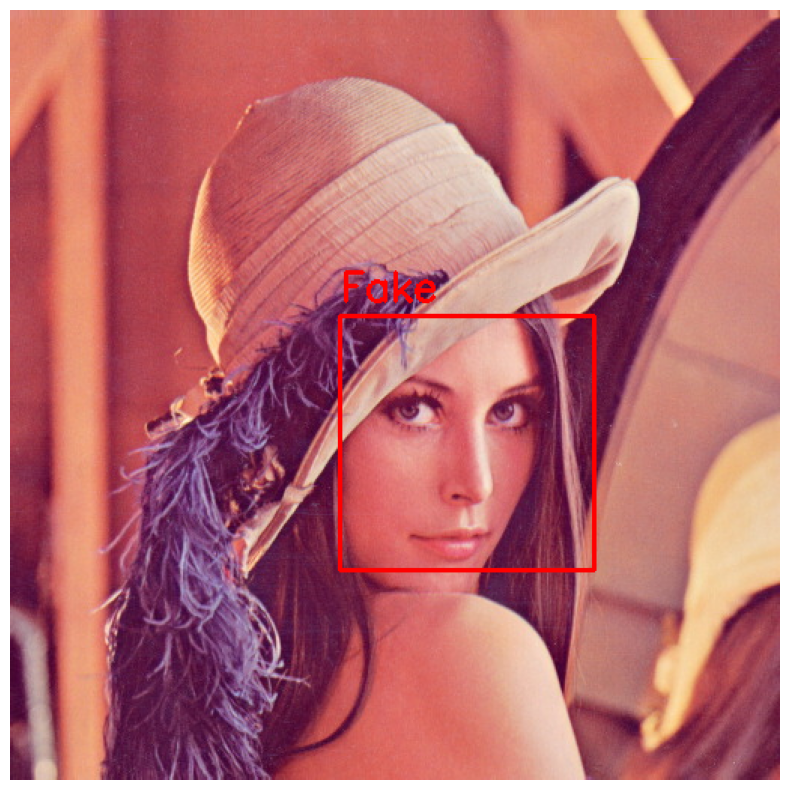

In [5]:
# Step 1: Install required libraries
!pip install opencv-python-headless
!pip install tensorflow keras matplotlib

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Generate a simple dataset
def generate_dummy_data(num_real=500, num_fake=500, img_size=(64, 64)):
    real_faces = np.random.rand(num_real, img_size[0], img_size[1], 3)  # Replace with real faces
    fake_faces = np.random.rand(num_fake, img_size[0], img_size[1], 3)  # Replace with noise or fake faces

    labels_real = np.zeros((num_real, 1))  # 0 for real
    labels_fake = np.ones((num_fake, 1))   # 1 for fake

    data = np.vstack((real_faces, fake_faces))
    labels = np.vstack((labels_real, labels_fake))

    return train_test_split(data, labels, test_size=0.2, random_state=42)

# Generate the data
X_train, X_test, y_train, y_test = generate_dummy_data()

# Step 3: Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Step 4: Load an image and apply the detection
# Here we'll use an example image from OpenCV's sample images
image_url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
image_path = tf.keras.utils.get_file('lena.jpg', origin=image_url)
image = cv2.imread(image_path)

def detect_and_classify_faces(image, model):
    # Convert image to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load OpenCV's pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region
        face = image[y:y+h, x:x+w]

        # Resize and preprocess the face for classification
        face_resized = cv2.resize(face, (64, 64))
        face_array = np.expand_dims(face_resized, axis=0) / 255.0

        # Predict if the face is real or fake
        prediction = model.predict(face_array)[0][0]

        # Draw bounding box with green for real and red for fake
        color = (0, 255, 0) if prediction < 0.5 else (0, 0, 255)  # Green if real, Red if fake
        label = 'Real' if prediction < 0.5 else 'Fake'

        # Draw the rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    return image

# Perform detection and classification
output_image = detect_and_classify_faces(image, model)

# Convert image to RGB for displaying in matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the output
plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.axis('off')
plt.show()


In [2]:
# Step 1: Install required libraries
!pip install opencv-python-headless
!pip install tensorflow keras matplotlib

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 2: Generate a simple dataset (Optional)
def generate_dummy_data(num_real=500, num_fake=500, img_size=(64, 64)):
    real_faces = np.random.rand(num_real, img_size[0], img_size[1], 3)  # Replace with real faces
    fake_faces = np.random.rand(num_fake, img_size[0], img_size[1], 3)  # Replace with noise or fake faces

    labels_real = np.zeros((num_real, 1))  # 0 for real
    labels_fake = np.ones((num_fake, 1))   # 1 for fake

    data = np.vstack((real_faces, fake_faces))
    labels = np.vstack((labels_real, labels_fake))

    return train_test_split(data, labels, test_size=0.2, random_state=42)

# Generate the data
X_train, X_test, y_train, y_test = generate_dummy_data()

# Step 3: Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Step 4: Real-time face detection and classification
def detect_and_classify_faces(frame, model):
    # Convert image to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Load OpenCV's pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region
        face = frame[y:y+h, x:x+w]

        # Resize and preprocess the face for classification
        face_resized = cv2.resize(face, (64, 64))
        face_array = np.expand_dims(face_resized, axis=0) / 255.0

        # Predict if the face is real or fake
        prediction = model.predict(face_array)[0][0]

        # Draw bounding box with green for real and red for fake
        color = (0, 255, 0) if prediction < 0.5 else (0, 0, 255)  # Green if real, Red if fake
        label = 'Real' if prediction < 0.5 else 'Fake'

        # Draw the rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    return frame

# Step 5: Access the webcam and apply the detection in real-time
cap = cv2.VideoCapture(0)  # 0 for default webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection and classification
    output_frame = detect_and_classify_faces(frame, model)

    # Display the frame with bounding boxes
    cv2.imshow('Real-Time Face Detection', output_frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.4647 - loss: 0.7190 - val_accuracy: 0.4800 - val_loss: 0.6953
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.4886 - loss: 0.6948 - val_accuracy: 0.4800 - val_loss: 0.6935
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.4766 - loss: 0.6935 - val_accuracy: 0.4800 - val_loss: 0.6951
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.5237 - loss: 0.6929 - val_accuracy: 0.4800 - val_loss: 0.6934
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.4857 - loss: 0.6931 - val_accuracy: 0.4800 - val_loss: 0.6932
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.5019 - loss: 0.6924 - val_accuracy: 0.4800 - val_loss: 0.6944
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.5361 - loss: 0.6893 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.5572 - loss: 0.6887 - val_accuracy: 0.